In [1]:
#Importing the library
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
#importing the datasets
data=pd.read_csv("train.csv")

In [3]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data.shape


(14999, 9)

In [5]:
data.keys()

Index(['vidid', 'adview', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

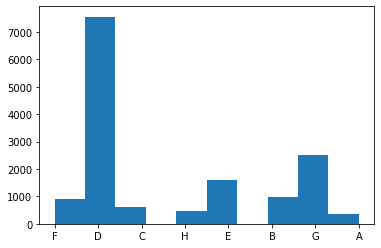

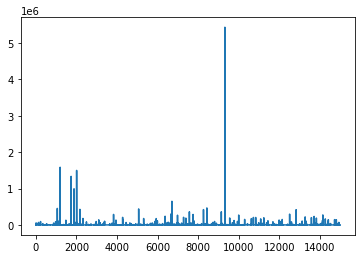

In [6]:
#Visualization
plt.hist(data["category"])
plt.show()
plt.plot(data["adview"])
plt.show()

In [7]:
# Remove videos with adview greater than 2000000 as outlier
data = data[data["adview"] <2000000]


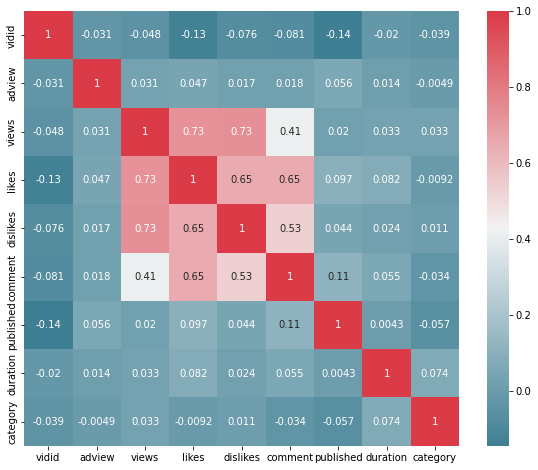

In [16]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()


In [9]:
# Removing character "F" present in data
data=data[data.views!='F']
data=data[data.likes!='F']
data=data[data.dislikes!='F']
data=data[data.comment!='F']


In [10]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [11]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data["category"]=data["category"].map(category)
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [12]:
# Convert values to integers for views, likes, comments, dislikes and adview
data["views"] = pd.to_numeric(data["views"])
data["comment"] = pd.to_numeric(data["comment"])
data["likes"] = pd.to_numeric(data["likes"])
data["dislikes"] = pd.to_numeric(data["dislikes"])
data["adview"]=pd.to_numeric(data["adview"])

In [13]:
column_vidid=data['vidid']

In [14]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])


In [15]:
data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [17]:
# Convert Time_in_sec for duration
import datetime
import time


In [18]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
         h = '00'
    if(m == ''):
         m = '00'
    if(s==''):
         s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data["duration"]=time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [19]:
# Split Data
Y_train = pd.DataFrame(data = data.iloc[:, 1].values, columns = ['target'])
data=data.drop(["adview"],axis=1)
data=data.drop(["vidid"],axis=1)
data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y_train, test_size=0.2, random_state=42)


In [21]:
X_train.shape

(11708, 7)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [23]:
X_train.mean()

0.1739096800320488

In [24]:
# Evaluation Metrics
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print("\n" ,type(model_name).__name__)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)



# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)


 LinearRegression
Mean Absolute Error: 3707.3780058245306
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986

 SVR
Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172
Root Mean Squared Error: 28873.617300732723


In [25]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)


 DecisionTreeRegressor
Mean Absolute Error: 2891.588456284153
Mean Squared Error: 1205656026.4067624
Root Mean Squared Error: 34722.557889746


In [26]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)


 RandomForestRegressor
Mean Absolute Error: 3249.5256343194237
Mean Squared Error: 569365381.654812
Root Mean Squared Error: 23861.37845252893


In [27]:
# Artificial Neural Network
import keras
from keras.layers import Dense
from tensorflow import keras
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])


In [28]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 2s 3ms/step - loss: 767407232.0000 - mean_squared_error: 767407232.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767402880.0000 - mean_squared_error: 767402880.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767391872.0000 - mean_squared_error: 767391872.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767372608.0000 - mean_squared_error: 767372608.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767342592.0000 - mean_squared_error: 767342592.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767299136.0000 - mean_squared_error: 767299136.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767240128.0000 - mean_squared_error: 767240128.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767165696.0000 - mean_squared_error:

366/366 [==============================] - 1s 2ms/step - loss: 763254592.0000 - mean_squared_error: 763254592.0000
Epoch 66/100
366/366 [==============================] - 1s 2ms/step - loss: 763225664.0000 - mean_squared_error: 763225664.0000
Epoch 67/100
366/366 [==============================] - 1s 2ms/step - loss: 763203008.0000 - mean_squared_error: 763203008.0000
Epoch 68/100
366/366 [==============================] - 1s 2ms/step - loss: 763176512.0000 - mean_squared_error: 763176512.0000
Epoch 69/100
366/366 [==============================] - 1s 2ms/step - loss: 763148032.0000 - mean_squared_error: 763148032.0000
Epoch 70/100
366/366 [==============================] - 1s 2ms/step - loss: 763121984.0000 - mean_squared_error: 763121984.0000
Epoch 71/100
366/366 [==============================] - 1s 2ms/step - loss: 763094656.0000 - mean_squared_error: 763094656.0000
Epoch 72/100
366/366 [==============================] - 1s 2ms/step - loss: 763078336.0000 - mean_squared_error: 7630

In [29]:
#Saving Scikitlearn models
import joblib
joblib.dump(supportvector_regressor, "SVR_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [30]:
data = pd.read_csv("test.csv")

In [31]:
data.keys()

Index(['vidid', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category'],
      dtype='object')

In [32]:
data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,F
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,D
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,G
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,B


In [33]:
# Removing character "F" present in data
data=data[data.views!='F']
data=data[data.likes!='F']
data=data[data.dislikes!='F']
data=data[data.comment!='F']

In [34]:
data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,F
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,D
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,G
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,B


In [35]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data["category"]=data["category"].map(category)
data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,6
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,4
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,7
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,2


In [36]:
# Convert values to integers for views, likes, comments, dislikes 
data["views"] = pd.to_numeric(data["views"])
data["comment"] = pd.to_numeric(data["comment"])
data["likes"] = pd.to_numeric(data["likes"])
data["dislikes"] = pd.to_numeric(data["dislikes"])

In [37]:
column_vidid=data['vidid']

In [38]:
# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data['duration']=LabelEncoder().fit_transform(data['duration'])
data['vidid']=LabelEncoder().fit_transform(data['vidid'])
data['published']=LabelEncoder().fit_transform(data['published'])


In [39]:
data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,1186,2115,2
1,3444,1040132,8171,340,1047,1898,2055,6
2,1593,28534,31,11,1,634,1506,4
3,3775,1316715,2284,250,274,307,2265,7
4,7644,1893173,2519,225,116,187,1625,2


In [40]:
# Convert Time_in_sec for duration
import datetime
import time

In [41]:
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
         h = '00'
    if(m == ''):
         m = '00'
    if(s==''):
         s='00'
    bp = h+':'+m+':'+s
    return bp
train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
data["duration"]=time1
data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,1186,449,2
1,3444,1040132,8171,340,1047,1898,389,6
2,1593,28534,31,11,1,634,2274,4
3,3775,1316715,2284,250,274,307,595,7
4,7644,1893173,2519,225,116,187,188,2


In [42]:
data=data.drop(["vidid"],axis=1)
data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,1186,449,2
1,1040132,8171,340,1047,1898,389,6
2,28534,31,11,1,634,2274,4
3,1316715,2284,250,274,307,595,7
4,1893173,2519,225,116,187,188,2


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test=data
X_test=scaler.fit_transform(X_test)

In [44]:
#loading the model

from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [45]:
prediction = model.predict(X_test)

In [46]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [47]:
prediction

,0
0,1446.211182
1,2601.271484
2,331.386536
3,601.248230
4,275.005066
...,...
8544,1645.462769
8545,-1713.185669
8546,2431.241455
8547,2061.710693


In [48]:
prediction = prediction.rename(columns={0: "Adview"})

In [49]:
prediction.head()

,Adview
0,1446.211182
1,2601.271484
2,331.386536
3,601.248230
4,275.005066


In [50]:
prediction.tail()

,Adview
8544,1645.462769
8545,-1713.185669
8546,2431.241455
8547,2061.710693
8548,1644.221191


In [51]:
prediction.to_csv('Prediction.csv')